In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from rasterio import plot
import rasterio
import geopandas
import pandas as pd
import numpy as np
from rasterio.mask import mask

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from utils import read_files, GeoPlot, SamplingValuesRaster, Zonal_stats

#### Specifying a folder will read files with given extensions

In [4]:
# I point to the folder with the files
path_files = read_files(r"C:\Users\larth\Documents\MAD-lab\data\proj")

In [5]:
path_files

[WindowsPath('C:/Users/larth/Documents/MAD-lab/data/proj/area.shp'),
 WindowsPath('C:/Users/larth/Documents/MAD-lab/data/proj/dem.tif'),
 WindowsPath('C:/Users/larth/Documents/MAD-lab/data/proj/idro.shp'),
 WindowsPath('C:/Users/larth/Documents/MAD-lab/data/proj/siti.shp'),
 WindowsPath('C:/Users/larth/Documents/MAD-lab/data/proj/values100.tif'),
 WindowsPath('C:/Users/larth/Documents/MAD-lab/data/proj/valuesnan.tif')]

### Create a DataFrame with given raster or vector

In [6]:
raster_list = []
vector_list = []


for elem in path_files:
    if elem.suffix == '.shp':
        vector_list.append((elem.name, elem))
    elif elem.suffix == ".tif":
        raster_list.append((elem.name, elem))


vector_df = pd.DataFrame(vector_list, columns=["name", "path"])
raster_df = pd.DataFrame(raster_list, columns=["name", "path"])



In [7]:
vector_df

,name,path
0,area.shp,C:\Users\larth\Documents\MAD-lab\data\proj\are...
1,idro.shp,C:\Users\larth\Documents\MAD-lab\data\proj\idr...
2,siti.shp,C:\Users\larth\Documents\MAD-lab\data\proj\sit...


In [8]:
raster_df

,name,path
0,dem.tif,C:\Users\larth\Documents\MAD-lab\data\proj\dem...
1,values100.tif,C:\Users\larth\Documents\MAD-lab\data\proj\val...
2,valuesnan.tif,C:\Users\larth\Documents\MAD-lab\data\proj\val...


#### Selecting data

In [9]:
selected_raster_name = ["dem.tif", "values100.tif"]

In [10]:
selected_raster = raster_df.loc[raster_df["name"].isin(selected_raster_name)]

In [11]:
selected_raster

,name,path
0,dem.tif,C:\Users\larth\Documents\MAD-lab\data\proj\dem...
1,values100.tif,C:\Users\larth\Documents\MAD-lab\data\proj\val...


In [12]:
### Set a colormap for plotting
selected_raster["color"] = ["viridis", "viridis"]

In [13]:
selected_raster

,name,path,color
0,dem.tif,C:\Users\larth\Documents\MAD-lab\data\proj\dem...,viridis
1,values100.tif,C:\Users\larth\Documents\MAD-lab\data\proj\val...,viridis


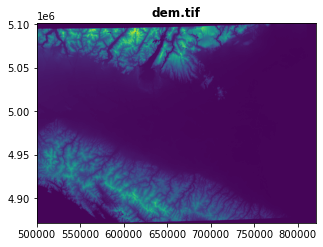

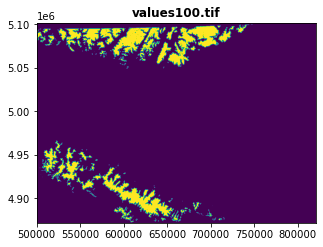

In [14]:
# Plot selected raster
for n in range(len(selected_raster)):
    fig, ax1 = plt.subplots(figsize = (5,5))
    my_raster = rasterio.open(selected_raster.iloc[n]["path"])
    ax1 = plot.show(my_raster, title=selected_raster.iloc[n]["name"])


In [15]:
selected_vector_name = ["siti.shp", "idro.shp"]

In [16]:
selected_vector = vector_df.loc[vector_df["name"].isin(selected_vector_name)]

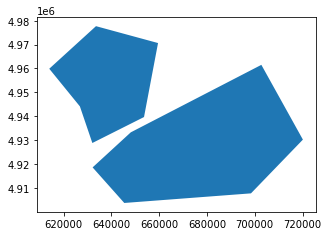

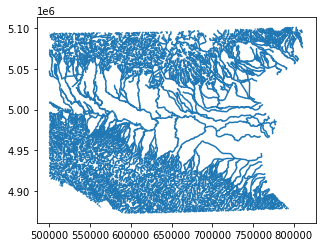

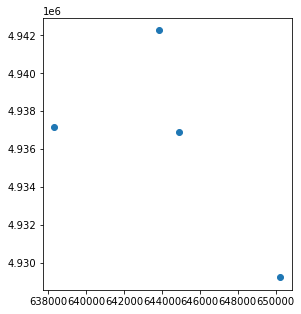

In [17]:
# Plot selected vector
for n in range(len(vector_df)):
    fig, ax = plt.subplots(figsize = (5,5))
    my_vector = geopandas.read_file(vector_df.iloc[n]["path"])
    my_vector.plot(ax=ax)

## Plotting

Plot data using DataFrame

In [18]:
selected_raster.index

Int64Index([0, 1], dtype='int64')

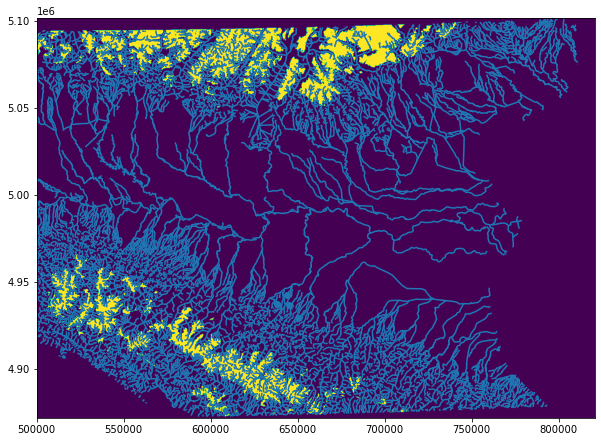

In [19]:
GeoPlot(selected_vector, selected_raster)

### SAMPLING RASTER

In [20]:
agent = geopandas.read_file(vector_df.iloc[2]["path"])

In [21]:
values = SamplingValuesRaster(agent, selected_raster)

In [22]:
values

,id,nome,geometry,dem.tif,values100.tif
0,None,fake_01,POINT (638322.101 4937193.028),119.0,0.0
1,None,fake_02,POINT (643837.210 4942267.643),59.0,0.0
2,None,fake_03,POINT (650247.344 4929235.005),187.0,0.0
3,None,fake_04,POINT (644896.894 4936904.995),90.0,0.0


In [38]:
multiple_stats = []

for ind in selected_raster.index:
    my_raster = rasterio.open(selected_raster.loc[ind]["path"])
    zonal_stats = Zonal_stats(agent, my_raster, buffer_size=10000)
    zonal_stats["name"] = selected_raster.loc[ind]["name"]
    multiple_stats.append(zonal_stats)
    

In [39]:
pd.concat(multiple_stats)

,id,nome,geometry,buffer,mean,median,std,max,min,name
0,None,fake_01,POINT (638322.101 4937193.028),"POLYGON ((648322.101 4937193.028, 648273.948 4...",147.386496,114.0,92.039181,470.0,147.386496,dem.tif
1,None,fake_02,POINT (643837.210 4942267.643),"POLYGON ((653837.210 4942267.643, 653789.057 4...",68.090887,56.0,39.518610,378.0,68.090887,dem.tif
2,None,fake_03,POINT (650247.344 4929235.005),"POLYGON ((660247.344 4929235.005, 660199.191 4...",215.862368,165.0,143.063597,827.0,215.862368,dem.tif
3,None,fake_04,POINT (644896.894 4936904.995),"POLYGON ((654896.894 4936904.995, 654848.741 4...",115.513739,87.0,79.509432,482.0,115.513739,dem.tif
0,None,fake_01,POINT (638322.101 4937193.028),"POLYGON ((648322.101 4937193.028, 648273.948 4...",0.000000,0.0,0.000000,0.0,0.000000,values100.tif
1,None,fake_02,POINT (643837.210 4942267.643),"POLYGON ((653837.210 4942267.643, 653789.057 4...",0.000000,0.0,0.000000,0.0,0.000000,values100.tif
2,None,fake_03,POINT (650247.344 4929235.005),"POLYGON ((660247.344 4929235.005, 660199.191 4...",0.000000,0.0,0.000000,0.0,0.000000,values100.tif
3,None,fake_04,POINT (644896.894 4936904.995),"POLYGON ((654896.894 4936904.995, 654848.741 4...",0.000000,0.0,0.000000,0.0,0.000000,values100.tif


### SAMPLING VECTOR

In [28]:
def SamplingValuesVector(agent, vector):
    #my_list = []
    agent_copy = agent.copy()
    for n in range(len(vector)):
        my_vector = geopandas.read_file(vector.iloc[n]["path"])
        agent_copy_joined = agent_copy.sjoin(my_vector, how="left")
    return agent_copy_joined

In [29]:
vector_df

,name,path
0,area.shp,C:\Users\larth\Documents\MAD-lab\data\proj\are...
1,idro.shp,C:\Users\larth\Documents\MAD-lab\data\proj\idr...
2,siti.shp,C:\Users\larth\Documents\MAD-lab\data\proj\sit...


### SAMPLING IN VECTOR: ISSSUES

In [30]:
zao = SamplingValuesVector(agent, vector_df)

In [31]:
zao

,id_left,nome_left,geometry,index_right,id_right,nome_right
0,None,fake_01,POINT (638322.101 4937193.028),0,None,fake_01
1,None,fake_02,POINT (643837.210 4942267.643),1,None,fake_02
2,None,fake_03,POINT (650247.344 4929235.005),2,None,fake_03
3,None,fake_04,POINT (644896.894 4936904.995),3,None,fake_04


In [32]:
vector_df[:1]

,name,path
0,area.shp,C:\Users\larth\Documents\MAD-lab\data\proj\are...


In [33]:
zao = SamplingValuesVector(agent, vector_df[:1])

In [34]:
zao

,id_left,nome,geometry,index_right,id_right,area
0,None,fake_01,POINT (638322.101 4937193.028),0,1,10
1,None,fake_02,POINT (643837.210 4942267.643),0,1,10
2,None,fake_03,POINT (650247.344 4929235.005),1,2,2
3,None,fake_04,POINT (644896.894 4936904.995),0,1,10
